<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/Churn_Prediction_Student_Notebook_E_H1_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [ ]:
# !pip install pyforest
# !pip install ipython
# !pip install pyclustertend
# !pip install xlrd
# !pip install Autoviz
# !pip3 install termcolor
# !pip install termcolor
# !pip install pandas-profiling
# !pip install lightgbm
# !pip3 install catboost
# !pip install colorama
# !pip install plotly
# !pip install pyyaml==5.4.1
!pip install pyforest
# !pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=71060133341c8327686b5b32007d6a428a0805194b6a9988e7bb2e8449db03b6
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
!pip install cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

!pip install colorama
import colorama
from colorama import Fore, Style  # maakes strings colored
!pip3 install termcolor
from termcolor import colored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
###############################################################################
# Function for determining the number and percentages of missing values


def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################
# To view summary information about the column

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'magenta', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'magenta', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'magenta', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'magenta', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'magenta', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=0, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

In [ ]:
def first_looking_col(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [ ]:
def matris_scorer(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
def model_scorer(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

### Importing Modules

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df0 = pd.read_csv("/content/drive/MyDrive/Data/HR_Dataset.csv")
df = df0.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [ ]:
df.shape

(14999, 10)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.400,0.570,2,151,3,0,1,0,support,low
14995,0.370,0.480,2,160,3,0,1,0,support,low
14996,0.370,0.530,2,143,3,0,1,0,support,low
14997,0.110,0.960,6,280,4,0,1,0,support,low
14998,0.370,0.520,2,158,3,0,1,0,support,low


In [ ]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
8245,0.500,0.590,3,192,2,0,0,0,sales,low
10021,0.610,1.000,4,133,4,0,0,0,sales,low
8499,0.400,0.370,3,123,2,0,0,0,sales,medium
4572,0.670,0.990,5,237,3,0,0,0,product_mng,medium
10916,0.790,0.790,4,231,2,0,0,0,sales,low


In [ ]:
first_looking(df)

Shape:(14999, 10)
There is 14999 observation and 10 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
-------------------------------------

In [ ]:
duplicate_values(df) # burda direk dusurduk dogru bir yaklasim miu


3008duplicates were dropped
-------------------------------------------------------------------------------


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.000,0.630,0.241,0.090,0.480,0.660,0.820,1.000
last_evaluation,11991.000,0.717,0.168,0.360,0.570,0.720,0.860,1.000
number_project,11991.000,3.803,1.163,2.000,3.000,4.000,5.000,7.000
average_montly_hours,11991.000,200.474,48.728,96.000,157.000,200.000,243.000,310.000
time_spend_company,11991.000,3.365,1.330,2.000,3.000,3.000,4.000,10.000
work_accident,11991.000,0.154,0.361,0.000,0.000,0.000,0.000,1.000
left,11991.000,0.166,0.372,0.000,0.000,0.000,0.000,1.000
promotion_last_5years,11991.000,0.017,0.129,0.000,0.000,0.000,0.000,1.000


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
departments_,11991,10,sales,3239
salary,11991,3,low,5740


In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

satisfaction_level has 92 unique value
last_evaluation has 65 unique value
number_project has 6 unique value
average_montly_hours has 215 unique value
time_spend_company has 8 unique value
work_accident has 2 unique value
left has 2 unique value
promotion_last_5years has 2 unique value


In [ ]:
df.groupby("left")["satisfaction_level", "last_evaluation", 
                   "number_project", "average_montly_hours", 
                   "time_spend_company", "work_accident", 
                   "promotion_last_5years"].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004


In [ ]:
# at first sight, we see the difference between them in terms of satisfaction level, number of projects, average monthly hours and promotion in last 5 years.
# there seems to be an unexpected difference in terms of work accident.
# Let's use statistics. 

In [ ]:
df_left = df[df["left"]==1]
df_stayed = df[df["left"]==0]

<Figure size 864x432 with 0 Axes>

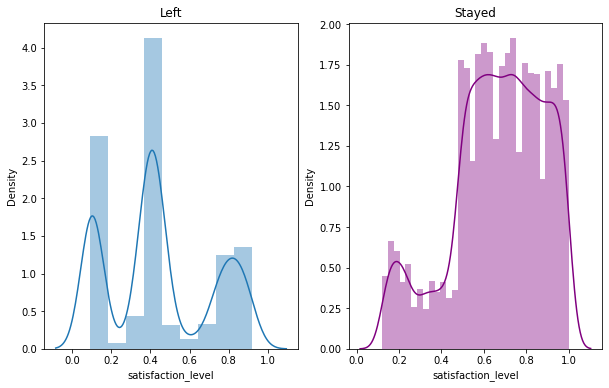

In [ ]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots(1,2)

sns.distplot(df_left.satisfaction_level, ax=ax[0])
sns.distplot(df_stayed.satisfaction_level, ax=ax[1], color="purple")
ax[0].set_title("Left")
ax[1].set_title("Stayed");

In [ ]:
# Because of them not being normally distributed, we use Mann Whitney U test. If they were normally distributed, we would use independent sample t test.

p = stats.mannwhitneyu(df_left["satisfaction_level"],df_stayed["satisfaction_level"], alternative="less")

if p.pvalue < 0.05:
    print(f"The difference between left and stayed employees' satisfaction levels is statistically significant with the pvalue of {p.pvalue}")
else:
    print("There is no statistically significant difference between left and stayed employees' satisfaction levels")

The difference between left and stayed employees' satisfaction levels is statistically significant with the pvalue of 1.120128905973389e-266


<Figure size 864x432 with 0 Axes>

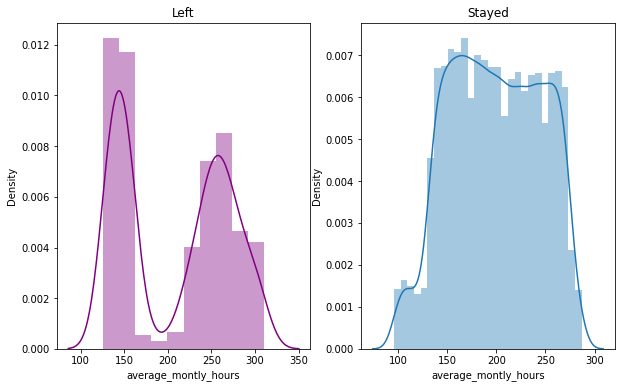

In [ ]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots(1,2)

ax[0].set_title("Left")
ax[1].set_title("Stayed");

sns.distplot(df_left.average_montly_hours, ax= ax[0], color="purple")
sns.distplot(df_stayed.average_montly_hours, ax= ax[1]);

In [ ]:
p = stats.mannwhitneyu(df_left["average_montly_hours"],df_stayed["average_montly_hours"], alternative="greater")

if p.pvalue < 0.05:
    print(f"The difference between left and stayed employees' average monthly hours is statistically significant with the pvalue of {p.pvalue}")
else:
    print("There is no statistically significant difference between left and stayed employees' average monthly hours")

The difference between left and stayed employees' average monthly hours is statistically significant with the pvalue of 9.16199998498996e-08


In [ ]:
df.groupby("departments_")["left"].value_counts(normalize=True)

departments_  left
IT            0      0.838
              1      0.162
RandD         0      0.878
              1      0.122
accounting    0      0.824
              1      0.176
hr            0      0.812
              1      0.188
management    0      0.881
              1      0.119
marketing     0      0.834
              1      0.166
product_mng   0      0.840
              1      0.160
sales         0      0.830
              1      0.170
support       0      0.829
              1      0.171
technical     0      0.826
              1      0.174
Name: left, dtype: float64

In [ ]:
# while hr, accounting and technical departments have higher resignation rate, 
# management and RandD departments have lower rate.

In [ ]:
df.groupby("left")["salary"].value_counts(normalize=True)

left  salary
0     low      0.457
      medium   0.449
      high     0.094
1     low      0.590
      medium   0.386
      high     0.024
Name: salary, dtype: float64

In [ ]:
df.groupby("time_spend_company")["left"].value_counts(normalize=True)

time_spend_company  left
2                   0      0.989
                    1      0.011
3                   0      0.832
                    1      0.168
4                   0      0.753
                    1      0.247
5                   0      0.546
                    1      0.454
6                   0      0.799
                    1      0.201
7                   0      1.000
8                   0      1.000
10                  0      1.000
Name: left, dtype: float64

In [ ]:
first_looking_col("left")

column name    :  left
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0    10000
1     1991
Name: left, dtype: int64


In [ ]:
df[df['left']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10000.000000,0.667365,0.217082,0.120000,0.540000,0.690000,0.840000,1.000000
last_evaluation,10000.000000,0.715667,0.161919,0.360000,0.580000,0.710000,0.850000,1.000000
number_project,10000.000000,3.786800,0.981755,2.000000,3.000000,4.000000,4.000000,6.000000
average_montly_hours,10000.000000,198.942700,45.665507,96.000000,162.000000,198.000000,238.000000,287.000000
time_spend_company,10000.000000,3.262000,1.367239,2.000000,2.000000,3.000000,4.000000,10.000000
work_accident,10000.000000,0.174500,0.379558,0.000000,0.000000,0.000000,0.000000,1.000000
left,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
promotion_last_5years,10000.000000,0.019500,0.138281,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df[df['left']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1991.000000,0.440271,0.265207,0.090000,0.110000,0.410000,0.730000,0.920000
last_evaluation,1991.000000,0.721783,0.197436,0.450000,0.520000,0.790000,0.910000,1.000000
number_project,1991.000000,3.883476,1.817139,2.000000,2.000000,4.000000,6.000000,7.000000
average_montly_hours,1991.000000,208.162230,61.295145,126.000000,146.000000,226.000000,262.500000,310.000000
time_spend_company,1991.000000,3.881467,0.974041,2.000000,3.000000,4.000000,5.000000,6.000000
work_accident,1991.000000,0.052737,0.223565,0.000000,0.000000,0.000000,0.000000,1.000000
left,1991.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
promotion_last_5years,1991.000000,0.004018,0.063277,0.000000,0.000000,0.000000,0.000000,1.000000


## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

0    10000
1     1991
Name: left, dtype: int64


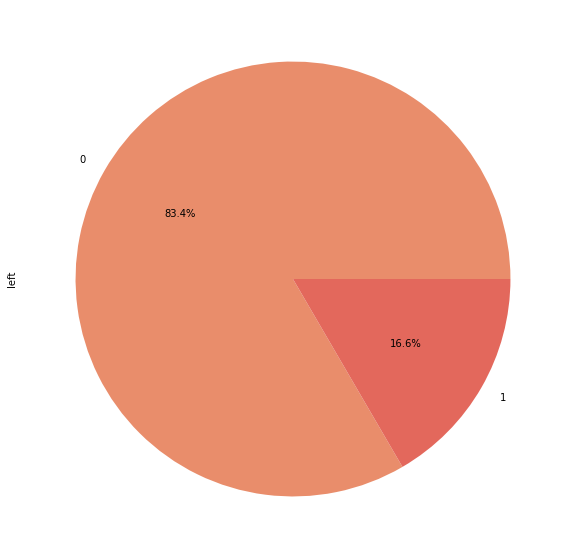

In [ ]:
print(df["left"].value_counts())
colors = sns.color_palette('flare')[0:5]
df["left"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10), colors= colors);

In [ ]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

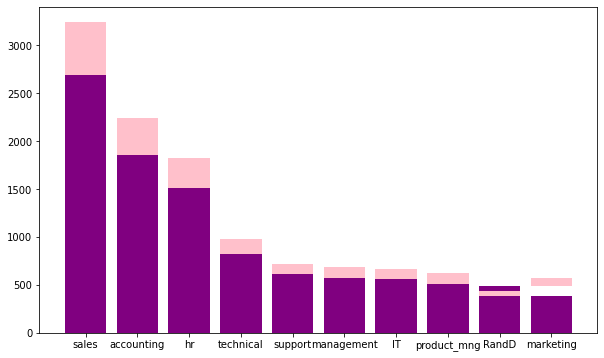

In [ ]:
plt.bar(df_stayed["departments_"].unique(), df_stayed["departments_"].value_counts(),color='purple')
plt.bar(df_left["departments_"].unique(), df_left["departments_"].value_counts(), bottom=df_stayed["departments_"].value_counts(),color='pink');

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
df['left'].iplot(kind='hist',color='purple')

In [ ]:
for i in df:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='purple')

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments_', 'salary'],
      dtype='object')

In [ ]:
df.groupby("promotion_last_5years")["left"].count()

promotion_last_5years
0    11788
1      203
Name: left, dtype: int64

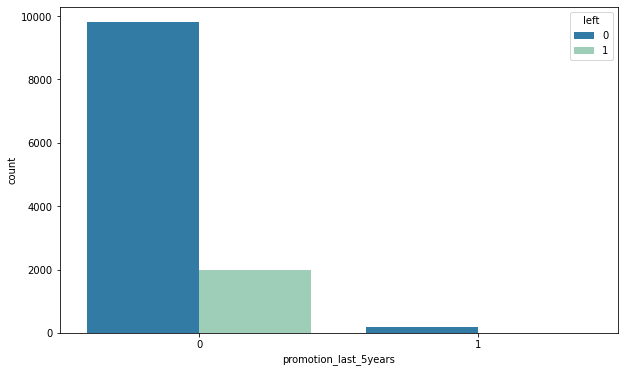

In [ ]:
sns.countplot(x=df["promotion_last_5years"],hue= df.left, palette= "YlGnBu_r")
plt.show()

In [ ]:
df.groupby("time_spend_company")["left"].count()

time_spend_company
2     2910
3     5190
4     2005
5     1062
6      542
7       94
8       81
10     107
Name: left, dtype: int64

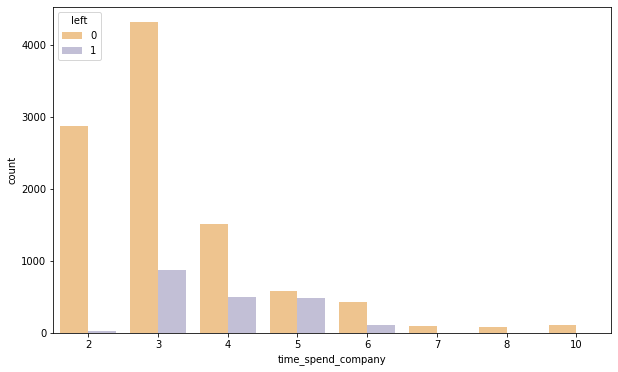

In [ ]:
sns.countplot(x=df["time_spend_company"],hue= df.left, palette= "PuOr")
plt.show()

In [ ]:
df.groupby("number_project")["left"].count()

number_project
2    1582
3    3520
4    3685
5    2233
6     826
7     145
Name: left, dtype: int64

In [ ]:
df.groupby("work_accident")["left"].count()

work_accident
0    10141
1     1850
Name: left, dtype: int64

In [ ]:
df.groupby("salary")["left"].count()

salary
high       990
low       5740
medium    5261
Name: left, dtype: int64

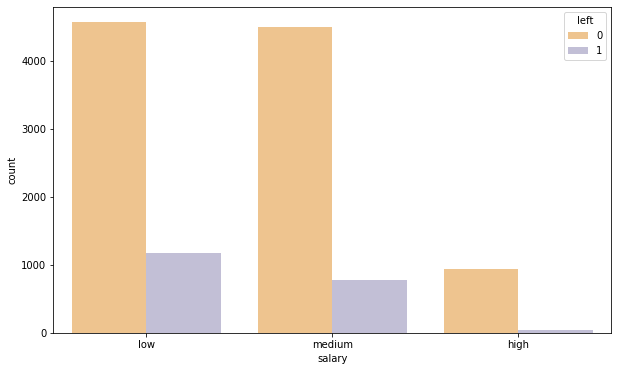

In [ ]:
sns.countplot(x=df["salary"],hue= df.left, palette= "PuOr")
plt.show()

In [ ]:
df.groupby("departments_")["left"].count()

departments_
IT              976
RandD           694
accounting      621
hr              601
management      436
marketing       673
product_mng     686
sales          3239
support        1821
technical      2244
Name: left, dtype: int64

In [ ]:
df.groupby("average_montly_hours")["left"].count()

average_montly_hours
96      6
97     13
98     20
99     11
100    17
       ..
306     8
307    10
308    10
309     7
310    14
Name: left, Length: 215, dtype: int64

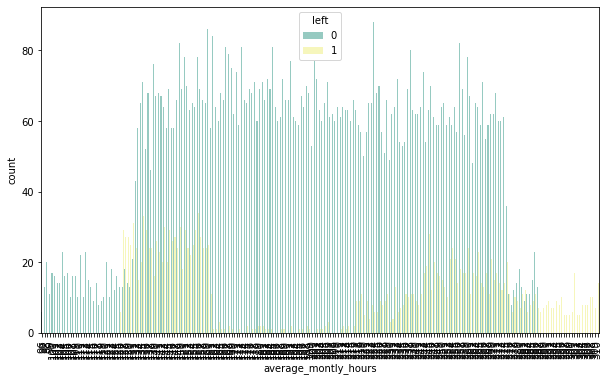

In [ ]:
sns.countplot(x=df["average_montly_hours"],hue= df.left, palette= "Set3")

plt.xticks(rotation=90);
plt.show()

In [ ]:
df.groupby("last_evaluation")["left"].count()

last_evaluation
0.360     19
0.370     46
0.380     42
0.390     45
0.400     49
0.410     52
0.420     45
0.430     44
0.440     35
0.450     78
0.460    131
0.470    121
0.480    212
0.490    242
0.500    269
0.510    264
0.520    233
0.530    247
0.540    252
0.550    281
0.560    248
0.570    258
0.580    203
0.590    221
0.600    186
0.610    200
0.620    197
0.630    204
0.640    198
0.650    176
0.660    191
0.670    205
0.680    193
0.690    176
0.700    184
0.710    171
0.720    182
0.730    189
0.740    227
0.750    209
0.760    192
0.770    212
0.780    181
0.790    195
0.800    201
0.810    210
0.820    195
0.830    211
0.840    218
0.850    244
0.860    219
0.870    241
0.880    187
0.890    235
0.900    244
0.910    224
0.920    207
0.930    209
0.940    199
0.950    211
0.960    208
0.970    218
0.980    208
0.990    197
1.000    200
Name: left, dtype: int64

In [ ]:
df.groupby("satisfaction_level")["left"].count()

satisfaction_level
0.090    110
0.100    203
0.110    188
0.120     26
0.130     45
0.140     62
0.150     69
0.160     59
0.170     62
0.180     56
0.190     58
0.200     56
0.210     63
0.220     53
0.230     51
0.240     68
0.250     29
0.260     28
0.270     23
0.280     24
0.290     32
0.300     38
0.310     42
0.320     42
0.330     30
0.340     44
0.350     36
0.360     98
0.370    130
0.380    116
0.390    111
0.400    126
0.410    104
0.420    108
0.430    141
0.440    138
0.450    121
0.460     63
0.470     34
0.480    120
0.490    177
0.500    200
0.510    160
0.520    172
0.530    150
0.540    166
0.550    159
0.560    166
0.570    179
0.580    162
0.590    185
0.600    167
0.610    176
0.620    162
0.630    184
0.640    164
0.650    171
0.660    192
0.670    158
0.680    145
0.690    178
0.700    176
0.710    152
0.720    199
0.730    201
0.740    214
0.750    188
0.760    188
0.770    194
0.780    194
0.790    177
0.800    186
0.810    176
0.820    180
0.830    196
0.840 

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

In [ ]:
df.groupby("number_project")["left"].count()

number_project
2    1582
3    3520
4    3685
5    2233
6     826
7     145
Name: left, dtype: int64

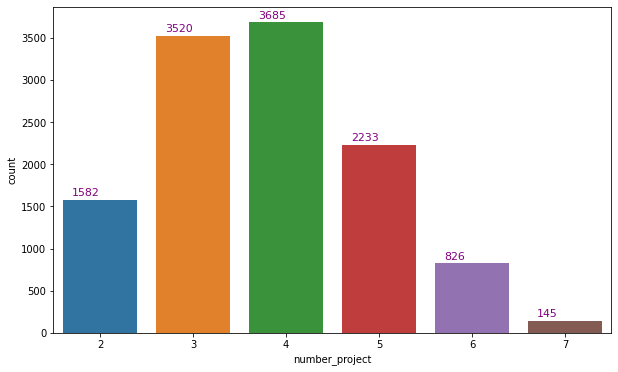

In [ ]:
ax = sns.countplot(df.number_project)
for p in ax.patches:
        ax.annotate(p.get_height().astype(int), (p.get_x()+0.1, p.get_height()+50), size=11,color="purple" ) 

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


In [ ]:
df.groupby("time_spend_company")["left"].count()

time_spend_company
2     2910
3     5190
4     2005
5     1062
6      542
7       94
8       81
10     107
Name: left, dtype: int64

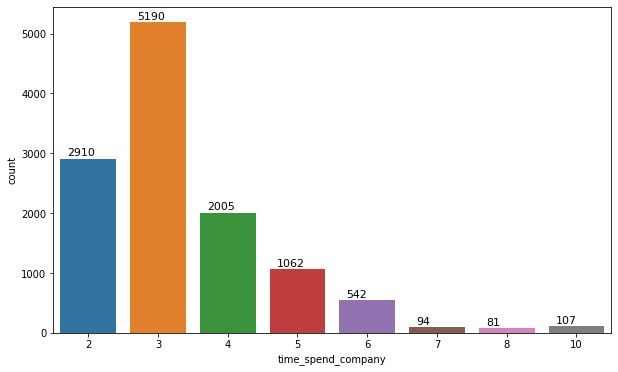

In [ ]:
ax = sns.countplot(df.time_spend_company)
for p in ax.patches:
        ax.annotate(p.get_height().astype(int), (p.get_x()+0.1, p.get_height()+50), size=11) 

### Subplots of Features

You can use the methods of the matplotlib.

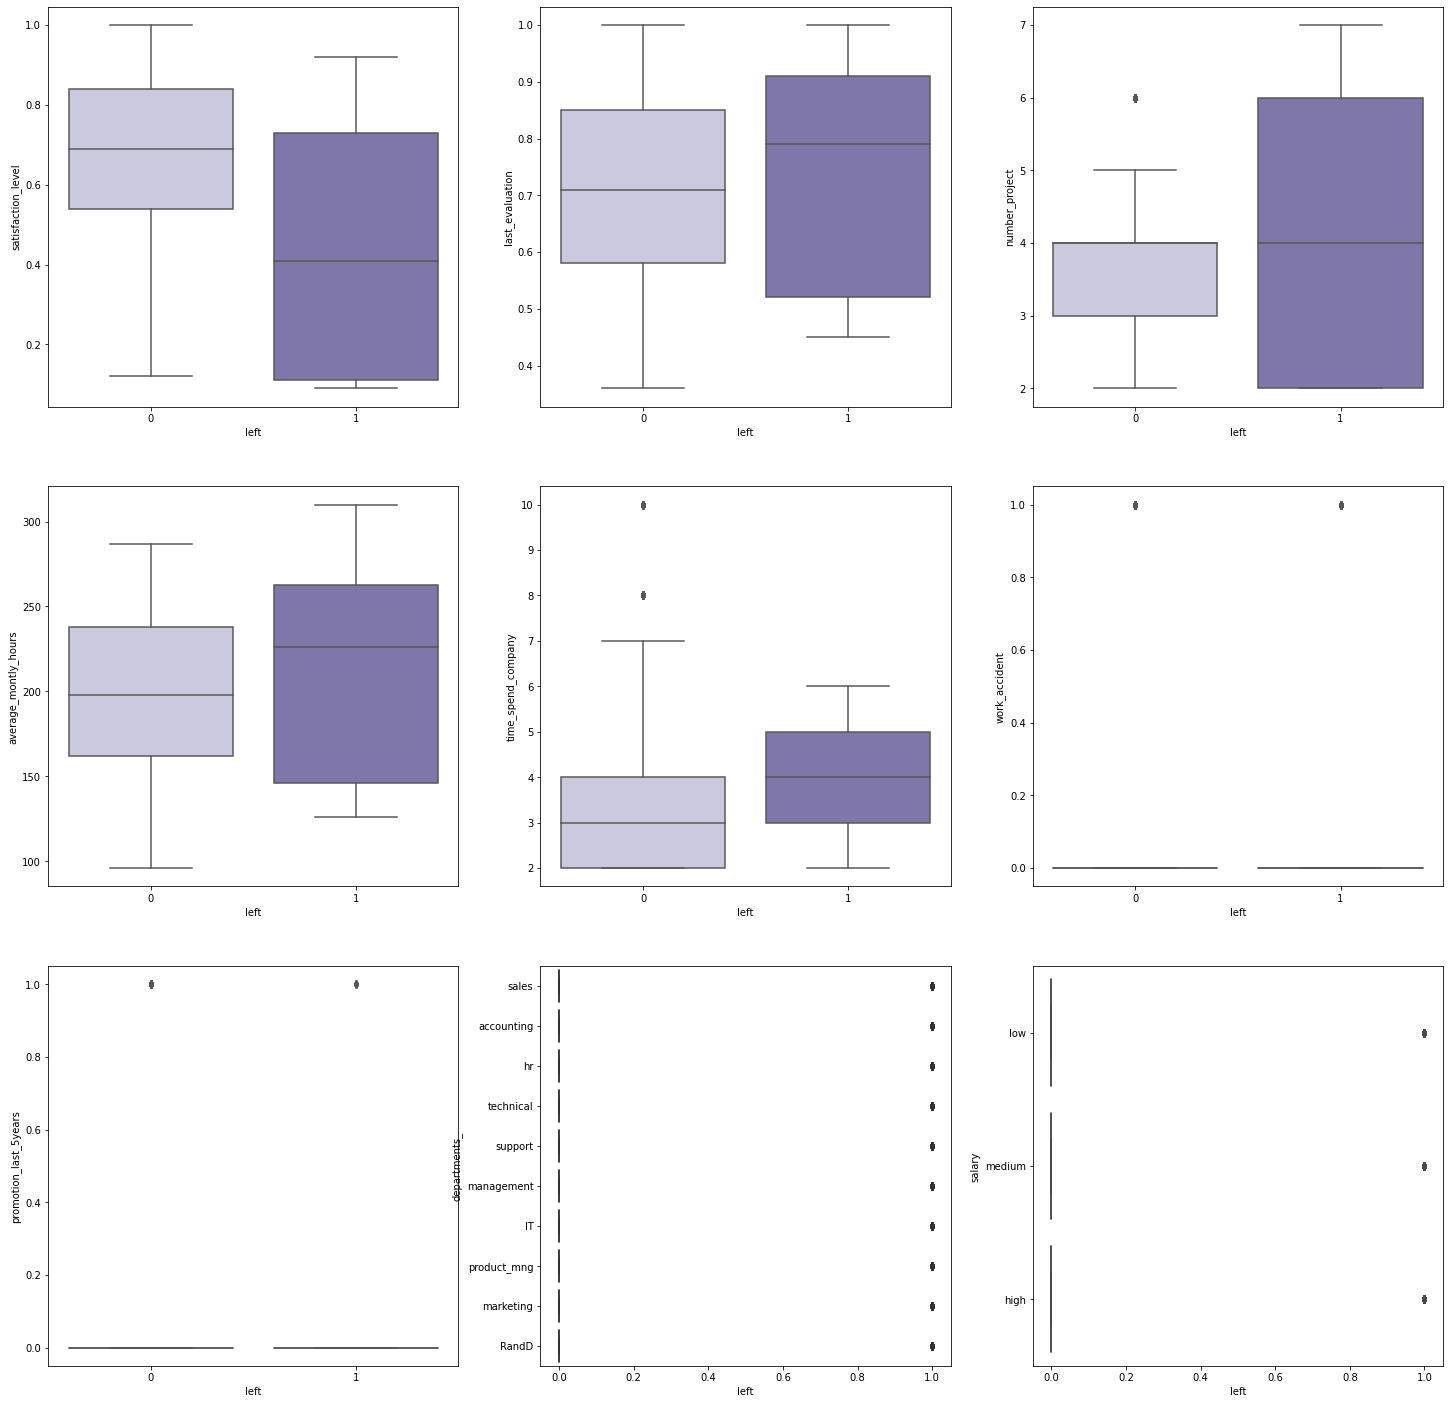

In [ ]:
index = 0
plt.figure(figsize=(25,25))
for feature in df:
    if feature != "left":
        index += 1
        plt.subplot(3, 3, index)
        sns.boxplot(x='left',palette="Purples",y=feature, data=df)

<Figure size 1440x720 with 0 Axes>

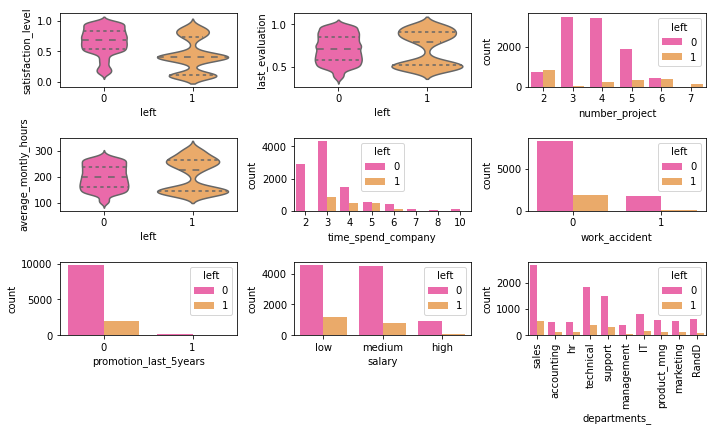

In [ ]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(3,3)

sns.violinplot(y=df.satisfaction_level, x=df.left, split=True, inner="quartile", ax=ax[0,0], palette ='spring')
sns.violinplot(y=df.last_evaluation, x=df.left, split=True, inner="quartile", ax=ax[0,1], palette ='spring')
sns.countplot(x=df.number_project, hue=df.left, ax=ax[0,2], palette ='spring')
sns.violinplot(y=df.average_montly_hours, x=df.left, split=True, inner="quartile", ax=ax[1,0], palette ='spring')
sns.countplot(x=df.time_spend_company, hue=df.left, ax=ax[1,1], palette ='spring')
sns.countplot(x=df.work_accident, hue=df.left, ax=ax[1,2], palette ='spring')
sns.countplot(x=df.promotion_last_5years, hue=df.left, ax=ax[2,0], palette ='spring')
sns.countplot(x=df.salary, hue=df.left, ax=ax[2,1], palette ='spring')
sns.countplot(x=df.departments_, hue=df.left, ax=ax[2,2],palette ='spring')
plt.xticks(rotation=90)
plt.tight_layout();

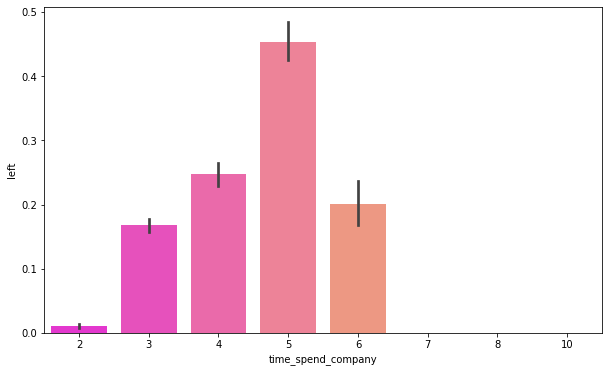

In [ ]:
sns.barplot(x='time_spend_company', y ='left' , data = df, palette ='spring')

<Figure size 864x432 with 0 Axes>

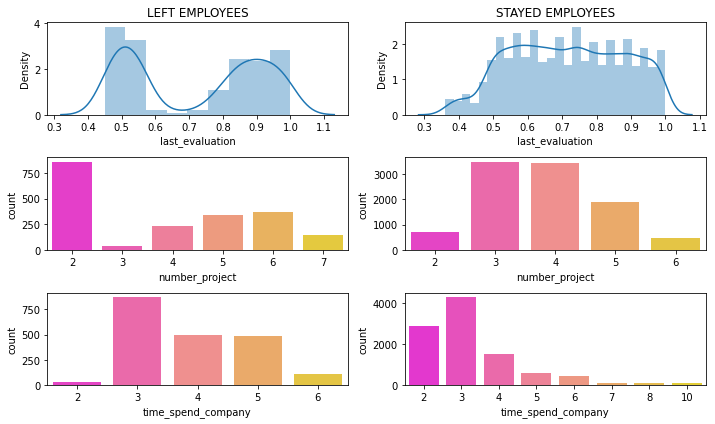

In [ ]:
# to show the distributions for each left and stayed employees seperately:

plt.figure(figsize=(12,6))
fig, ax = plt.subplots(nrows=3, ncols=2)

sns.distplot(df_left.last_evaluation, ax= ax[0,0])
sns.distplot(df_stayed.last_evaluation, ax= ax[0,1])

sns.countplot(df_left.number_project, ax=ax[1,0], palette ='spring')
sns.countplot(df_stayed.number_project, ax=ax[1,1], palette ='spring')

sns.countplot(df_left.time_spend_company, ax=ax[2,0],  palette ='spring')
sns.countplot(df_stayed.time_spend_company, ax=ax[2,1],  palette ='spring')

ax[0,0].set_title("LEFT EMPLOYEES")
ax[0,1].set_title("STAYED EMPLOYEES")

plt.tight_layout();

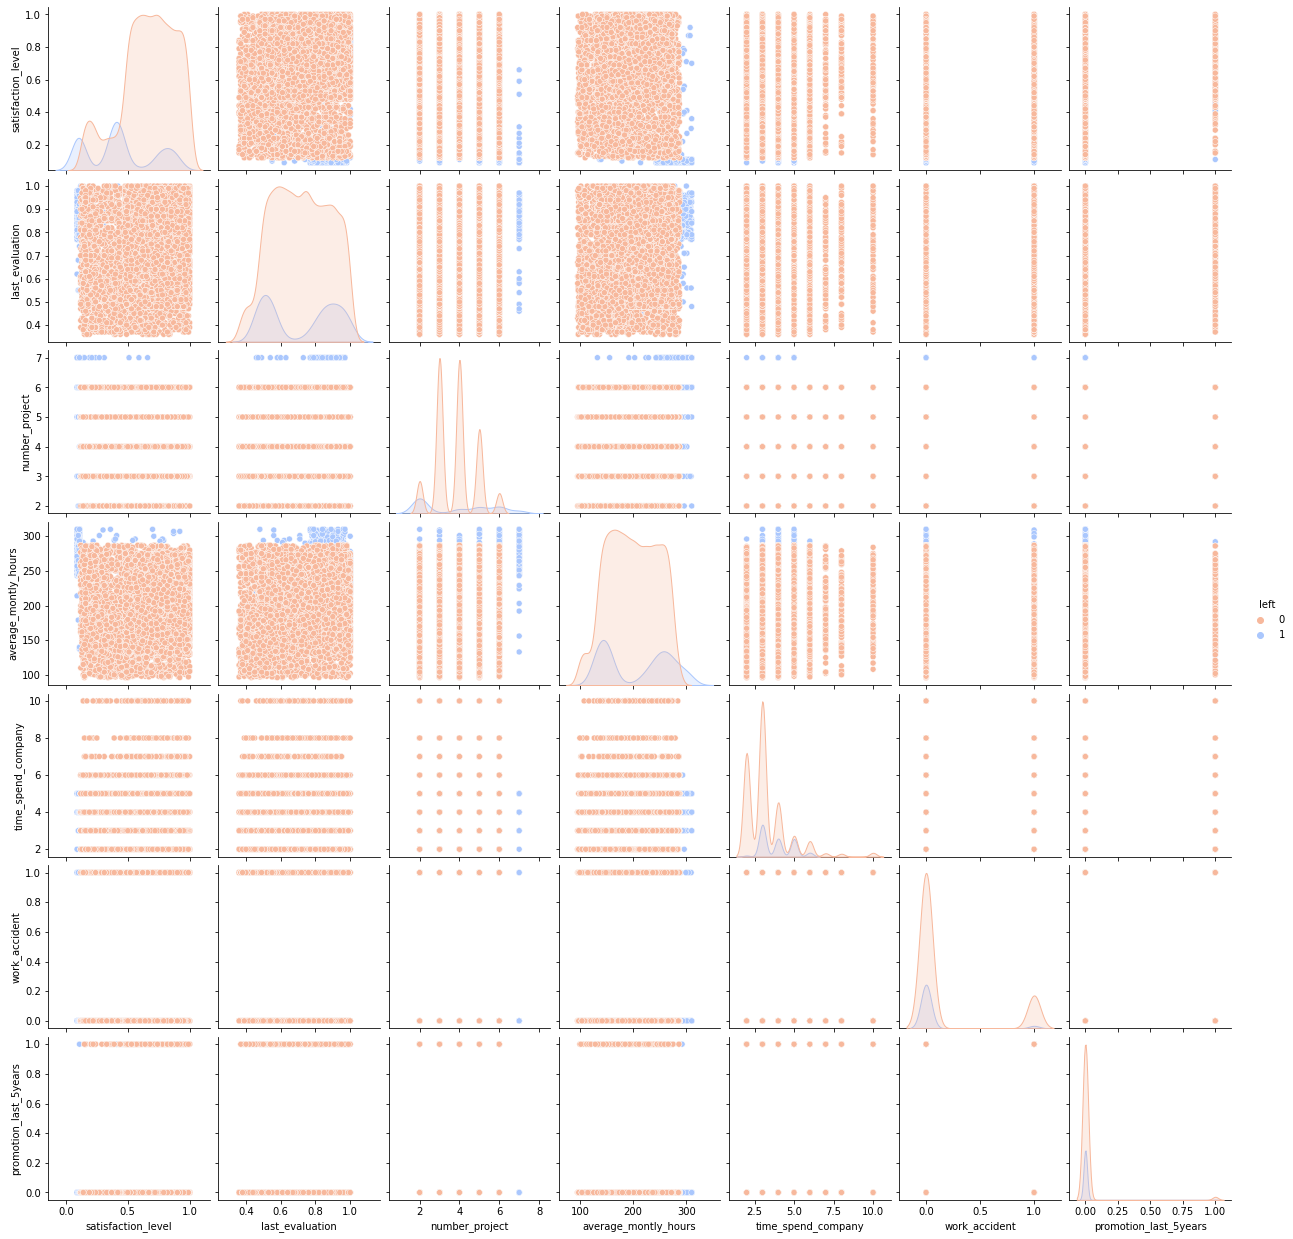

In [ ]:
sns.pairplot(df,hue='left',palette= "coolwarm_r")

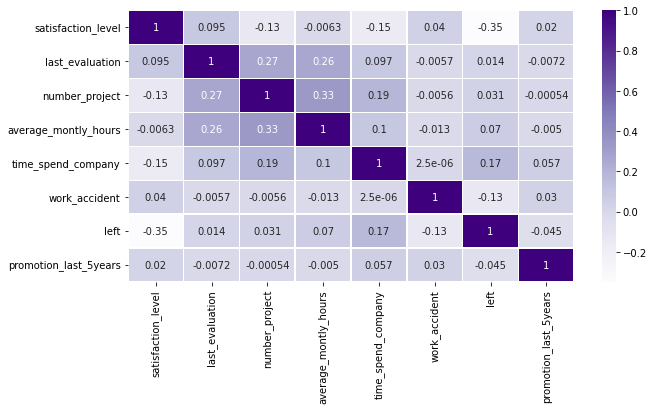

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot =True,linewidth = 0.5, cmap='Purples')

## 3. Data Pre-Processing

#### Ordinal Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as ordinal encoding, and sklearn conveniently will do this for you using [OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder).



In [ ]:
first_looking(df)

Shape:(11991, 10)
There is 11991 observation and 10 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments_           11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB
None
-------------------------------------

In [ ]:
df["departments_"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments_, dtype: int64

In [ ]:
enc = {"low":1, "medium":2, "high":3}
df["salary_le"] = df["salary"].replace(enc)


In [ ]:
drop_columns(df, "salary")

salary were dropped


In [ ]:
df.sample(12)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments_,salary_le
638,0.840,0.830,4,227,5,0,1,0,accounting,1
490,0.530,0.560,4,281,6,0,1,0,hr,2
10274,0.610,0.520,5,255,3,0,0,0,support,2
11076,0.590,0.480,3,197,3,0,0,0,product_mng,2
10497,0.740,0.930,6,225,4,0,0,0,technical,1
1341,0.900,0.940,5,247,5,0,1,0,technical,1
11866,0.670,0.970,4,196,3,0,0,0,support,2
5652,0.240,0.960,3,174,6,0,0,0,support,1
4727,0.760,0.960,4,135,3,1,0,1,RandD,1
9148,0.560,0.560,2,153,2,0,0,0,product_mng,2


In [ ]:
df_dummy= pd.get_dummies(df)

In [ ]:
df_dummy.sample().T

,7387
satisfaction_level,0.930
last_evaluation,0.710
number_project,5.000
average_montly_hours,270.000
time_spend_company,2.000
work_accident,0.000
left,0.000
promotion_last_5years,0.000
salary_le,3.000
departments__IT,0.000


In [ ]:
drop_columns(df_dummy, "departments__product_mng")

departments__product_mng were dropped


#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [ ]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

# k means

In [ ]:
# k means unsupervised algoritmamiz 
# kumeleme ve siniflandirma yaoiyor
# amac kac gruba ayicagini belirlemek
#  bunu elbow ile yapiyor
# bize verilerimizi unsupervised oldugu icin labellamadan islem yapiyor
# siniflandiriir ama kumelemez

In [ ]:
 !pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   last_evaluation          11991 non-null  float64
 2   number_project           11991 non-null  int64  
 3   average_montly_hours     11991 non-null  int64  
 4   time_spend_company       11991 non-null  int64  
 5   work_accident            11991 non-null  int64  
 6   left                     11991 non-null  int64  
 7   promotion_last_5years    11991 non-null  int64  
 8   salary_le                11991 non-null  int64  
 9   departments__IT          11991 non-null  uint8  
 10  departments__RandD       11991 non-null  uint8  
 11  departments__accounting  11991 non-null  uint8  
 12  departments__hr          11991 non-null  uint8  
 13  departments__management  11991 non-null  uint8  
 14  departments__marketing

In [ ]:
df_kmeans= df_dummy[["satisfaction_level", "last_evaluation", 
                     "number_project", "average_montly_hours",
                     "time_spend_company"]]
df_kmeans.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
6085,0.220,0.960,3,213,3


- We work unsupervissed learning, so we wont need target label here.
- So on the below we dropped it.

In [ ]:
scaler.fit(df_kmeans)

#Store it separately for clustering
df_kmeans_scaled = scaler.transform(df_kmeans)

In [ ]:
df_kmeans_scaled

array([[0.31868132, 0.265625  , 0.        , 0.28504673, 0.125     ],
       [0.78021978, 0.78125   , 0.6       , 0.77570093, 0.5       ],
       [0.02197802, 0.8125    , 1.        , 0.82242991, 0.25      ],
       ...,
       [0.83516484, 0.28125   , 0.2       , 0.41588785, 1.        ],
       [0.26373626, 0.453125  , 0.2       , 0.35514019, 1.        ],
       [0.45054945, 0.578125  , 0.4       , 0.39252336, 0.125     ]])

- Hopkinsle ilgili tanim yaz.

- Hopkints test gives score between 0-1.
- 0.08  show us how our data suit to clustering. 

In [ ]:
hopkins(df_kmeans_scaled, df_kmeans_scaled.shape[0])

0.2384375576453919

# Elbow

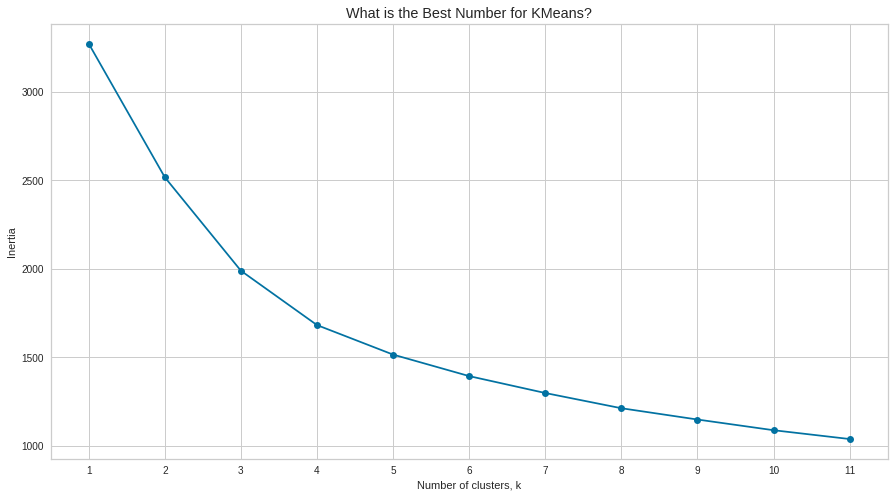

In [ ]:
ks = range(1, 12)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state= 16)
    kc.fit(df_kmeans_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans?')
plt.show()

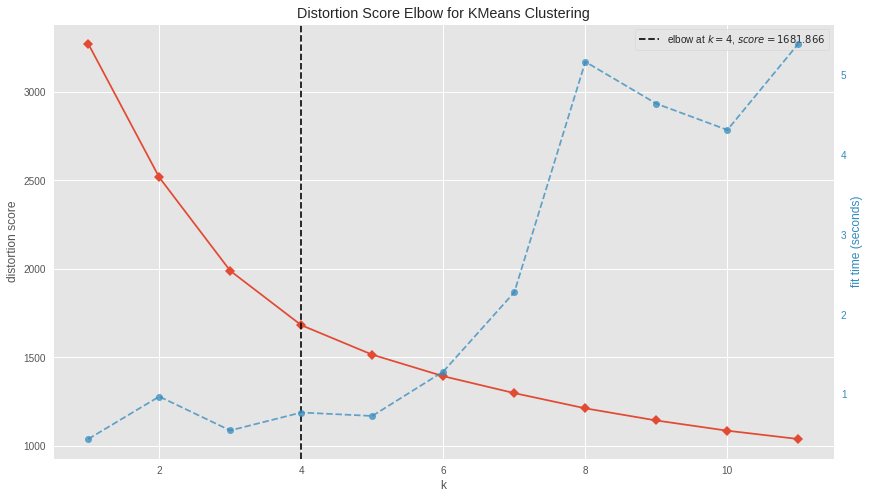

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))

plt.figure(figsize=(14, 8))
visualizer.fit(df_kmeans_scaled)        # Fit the data to the visualizer
visualizer.show() ;

# Silhouette Coefficient

In [ ]:
ssd =[]

K = range(2, 12)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_kmeans_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_kmeans_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.2199784971152224
Silhouette Score for 3 clusters: 0.2534462298594108
Silhouette Score for 4 clusters: 0.24338921334867158
Silhouette Score for 5 clusters: 0.2329381594904012
Silhouette Score for 6 clusters: 0.23197246265210655
Silhouette Score for 7 clusters: 0.23414527600076884
Silhouette Score for 8 clusters: 0.2307345548176027
Silhouette Score for 9 clusters: 0.2337922977914926
Silhouette Score for 10 clusters: 0.23562861909346886
Silhouette Score for 11 clusters: 0.23104630706084656


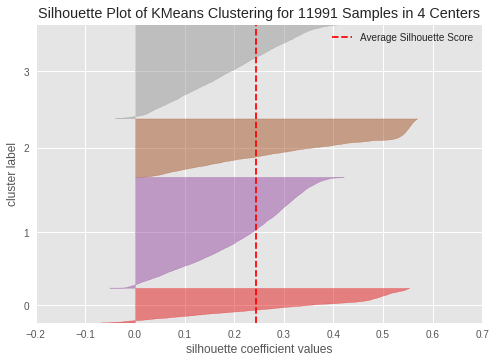

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_3 = KMeans(n_clusters=4, random_state= 16)
visualizer = SilhouetteVisualizer(model_3)

visualizer.fit(df_kmeans_scaled)    # Fit the data to the visualizer
visualizer.poof();

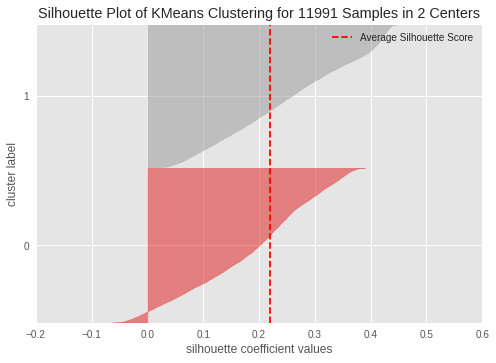

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_3 = KMeans(n_clusters=2, random_state= 16)
visualizer = SilhouetteVisualizer(model_3)

visualizer.fit(df_kmeans_scaled)    # Fit the data to the visualizer
visualizer.poof();

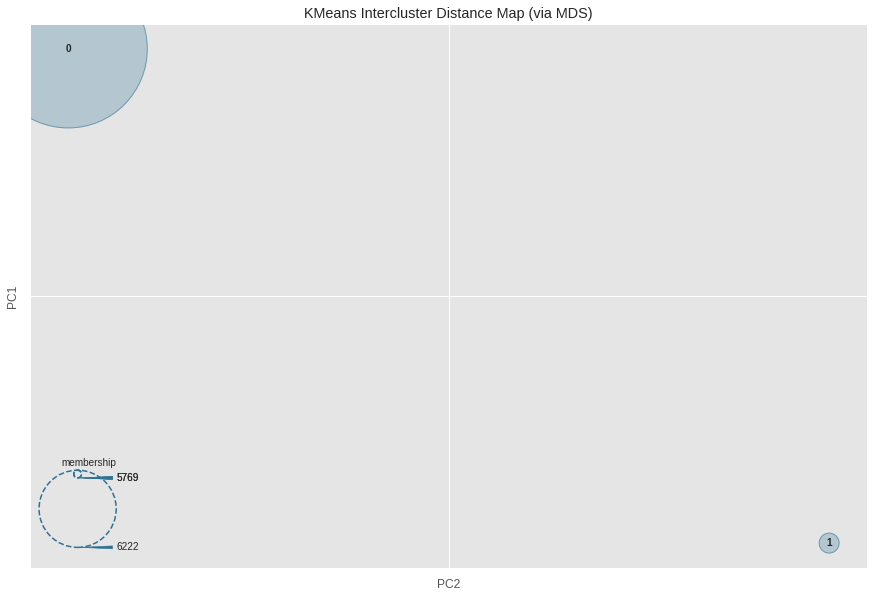

In [ ]:
from yellowbrick.cluster import InterclusterDistance
plt.rcParams["figure.figsize"] = (15, 10)

# Instantiate the clustering model and visualizer
model = KMeans(4)
visualizer = InterclusterDistance(model_3)

visualizer.fit(df_kmeans_scaled)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

#optimal k means


# cluster id belirmele konusunda anlasamadik huseyin hocayla o der 2 ben derim 4

In [ ]:
from sklearn.utils.sparsefuncs import inplace_column_scale
kmeans = KMeans(n_clusters = 4).fit(df_kmeans_scaled)
kmeans.fit_predict(df_kmeans_scaled)
labels = kmeans.labels_

In [ ]:
df_kmeans

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.380,0.530,2,157,3
1,0.800,0.860,5,262,6
2,0.110,0.880,7,272,4
3,0.720,0.870,5,223,5
4,0.370,0.520,2,159,3
...,...,...,...,...,...
11995,0.900,0.550,3,259,10
11996,0.740,0.950,5,266,10
11997,0.850,0.540,3,185,10
11998,0.330,0.650,3,172,10


In [ ]:
# df_kmeans_scaled['ClusterID']= labels
# df_kmeans_scaled.reset_index(inplace=True)

In [ ]:
df_kmeans_scaled # df 

array([[0.31868132, 0.265625  , 0.        , 0.28504673, 0.125     ],
       [0.78021978, 0.78125   , 0.6       , 0.77570093, 0.5       ],
       [0.02197802, 0.8125    , 1.        , 0.82242991, 0.25      ],
       ...,
       [0.83516484, 0.28125   , 0.2       , 0.41588785, 1.        ],
       [0.26373626, 0.453125  , 0.2       , 0.35514019, 1.        ],
       [0.45054945, 0.578125  , 0.4       , 0.39252336, 0.125     ]])

In [ ]:
# df_kmeans_scaled.ClusterID.value_counts()

In [ ]:
"""
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(4,2)

sns.violinplot(y=df.satisfaction_level, x=df1.cluster, split=True, inner="quartile", ax=ax[0,0])
sns.violinplot(y=df.last_evaluation, x=df1.cluster, split=True, inner="quartile", ax=ax[0,1])
sns.countplot(x=df.number_project, hue=df1.cluster, ax=ax[1,0])
sns.violinplot(y=df.average_montly_hours, x=df1.cluster, split=True, inner="quartile", ax=ax[1,1])
sns.countplot(x=df.time_spend_company, hue=df1.cluster, ax=ax[2,0])
sns.countplot(x=df.promotion_last_5years, hue=df1.cluster, ax=ax[2,1])
sns.countplot(x=df.salary, hue=df1.cluster, ax=ax[3,0])
sns.countplot(x=df.departments, hue=df1.cluster, ax=ax[3,1])
plt.xticks(rotation=90)
plt.tight_layout();
"""

'\nplt.figure(figsize=(20,10))\nfig, ax = plt.subplots(4,2)\n\nsns.violinplot(y=df.satisfaction_level, x=df1.cluster, split=True, inner="quartile", ax=ax[0,0])\nsns.violinplot(y=df.last_evaluation, x=df1.cluster, split=True, inner="quartile", ax=ax[0,1])\nsns.countplot(x=df.number_project, hue=df1.cluster, ax=ax[1,0])\nsns.violinplot(y=df.average_montly_hours, x=df1.cluster, split=True, inner="quartile", ax=ax[1,1])\nsns.countplot(x=df.time_spend_company, hue=df1.cluster, ax=ax[2,0])\nsns.countplot(x=df.promotion_last_5years, hue=df1.cluster, ax=ax[2,1])\nsns.countplot(x=df.salary, hue=df1.cluster, ax=ax[3,0])\nsns.countplot(x=df.departments, hue=df1.cluster, ax=ax[3,1])\nplt.xticks(rotation=90)\nplt.tight_layout();\n'

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts, for example, in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [ ]:
df_model, predict = \
              np.split(df_dummy.sample(frac=1, random_state=16), 
                       [int(.95*len(df_dummy))])

In [ ]:
df_model.shape

(11391, 18)

In [ ]:
predict.shape

(600, 18)

In [ ]:
X = df_model.drop(["left"], axis=1)
y = df_model["left"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify= y, random_state= 16)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

### #Gradient Boosting Classifier

#### Model Building

In [ ]:
clf1 = GradientBoostingClassifier(random_state=16)

In [ ]:
clf1.fit(X_train, y_train)

GradientBoostingClassifier(random_state=16)

In [ ]:
model_scorer(clf1, X_train, y_train, X_test, y_test)

,train_set,test_set
Accuracy,0.982,0.981
Precision,0.970,0.948
Recall,0.919,0.938
f1,0.944,0.943


In [ ]:
param_grid = {"n_estimators":[800, 900, 1000],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]}
grid_gb = GridSearchCV(clf1, param_grid, scoring = "accuracy",
                       verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
grid_gb.best_params_

{'max_features': 3, 'n_estimators': 900, 'subsample': 1}

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

In [ ]:
matris_scorer(grid_gb, X_train, y_train, X_test, y_test)

Test_Set
[[2824   28]
 [  34  532]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2852
           1       0.95      0.94      0.94       566

    accuracy                           0.98      3418
   macro avg       0.97      0.97      0.97      3418
weighted avg       0.98      0.98      0.98      3418


Train_Set
[[6644   10]
 [  60 1259]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6654
           1       0.99      0.95      0.97      1319

    accuracy                           0.99      7973
   macro avg       0.99      0.98      0.98      7973
weighted avg       0.99      0.99      0.99      7973



- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [ ]:
gb_scorer = model_scorer(grid_gb, X_train, y_train, X_test, y_test)
gb_scorer

,train_set,test_set
Accuracy,0.991,0.982
Precision,0.992,0.950
Recall,0.955,0.940
f1,0.973,0.945


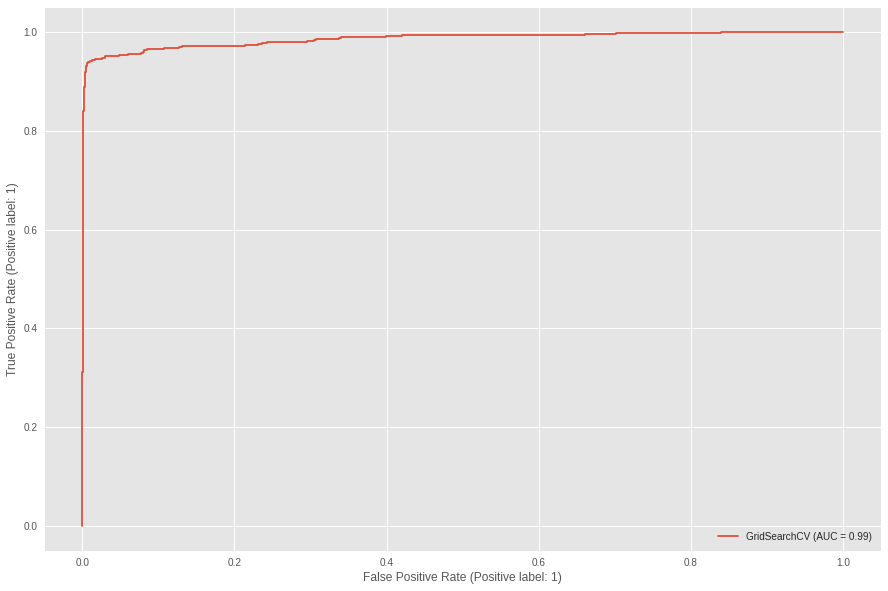

In [ ]:
plot_roc_curve(grid_gb, X_test, y_test);

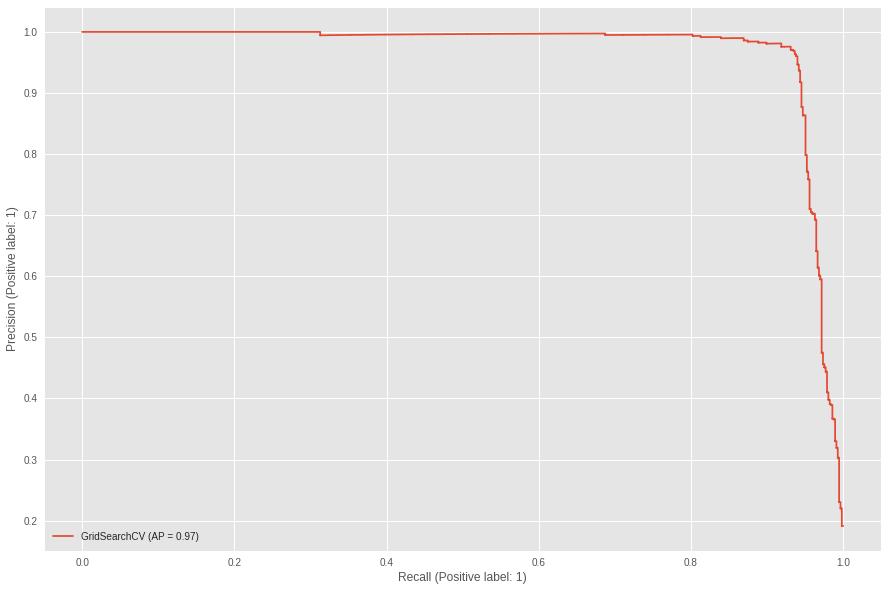

In [ ]:
plot_precision_recall_curve(grid_gb, X_test, y_test);

In [ ]:
gb_acc =gb_scorer["test_set"][0]

#### Prediction

In [ ]:
X_pred = predict.drop("left",axis= 1)
Y_result =predict["left"]

In [ ]:
X_pred_scaled= scaler.transform(X_pred)

In [ ]:
y_pred = grid_gb.predict(X_pred_scaled)

In [ ]:
y_pred_proba = grid_gb.predict_proba(X_pred_scaled)

In [ ]:
my_dict = {"Actual": Y_result, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
4797,0,0,0.000,1.000
544,1,0,0.000,1.000
3791,0,0,0.000,1.000
11694,0,0,0.087,0.913
7519,0,0,0.225,0.775
11787,0,0,0.000,1.000
5443,0,0,0.000,1.000
4358,0,0,0.000,1.000
8245,0,0,0.000,1.000
10146,0,0,0.000,1.000


### #KNeighbors Classifier

#### Model Building

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
clf2.fit(X_train_scaled, y_train)
model_scorer(clf2, X_train_scaled, y_train, X_test_scaled, y_test)

,train_set,test_set
Accuracy,0.959,0.944
Precision,0.877,0.815
Recall,0.873,0.853
f1,0.875,0.833


In [ ]:
k_values= range(1,30)

In [ ]:
param_grid_knn = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [ ]:
grid_knn = GridSearchCV(clf2, param_grid_knn, cv=10, scoring= 'accuracy')

In [ ]:
grid_knn.fit(X_train_scaled, y_train)
knn_scorer= model_scorer(grid_knn, X_train_scaled, y_train, X_test_scaled, y_test)
knn_scorer

In [ ]:
grid_knn.best_params_

#### Evaluating Model Performance

In [ ]:
plot_roc_curve(grid_knn, X_test_scaled, y_test);

In [ ]:
plot_precision_recall_curve(grid_knn, X_test_scaled, y_test);

In [ ]:
knn_acc = knn_scorer["test_set"][0]

#### Prediction

In [ ]:
y_pred = grid_knn.predict(X_pred_scaled)


In [ ]:
y_pred_proba = grid_knn.predict_proba(X_pred_scaled)


In [ ]:
my_dict = {"Actual": Y_result, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}


In [ ]:

pd.DataFrame.from_dict(my_dict).sample(10)

### #Random Forest Classifier

#### Model Building

In [ ]:
clf3 = RandomForestClassifier(random_state = 16)

In [ ]:
clf3.fit(X_train, y_train)
model_scorer(clf3, X_train, y_train, X_test, y_test)

In [ ]:
param_grid_rf = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [ ]:
grid_rf = GridSearchCV(clf3, param_grid_rf, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
grid_rf.fit(X_train, y_train)
rf_scorer = model_scorer(grid_rf, X_train, y_train, X_test, y_test)
rf_scorer

#### Evaluating Model Performance

In [ ]:
plot_roc_curve(grid_rf, X_test_scaled, y_test);

In [ ]:
plot_precision_recall_curve(grid_rf, X_test_scaled, y_test);

In [ ]:
rf_acc = rf_scorer["test_set"][0]

#### Prediction

In [ ]:
y_pred = grid_rf.predict(X_pred_scaled)


In [ ]:
y_pred_proba = grid_rf.predict_proba(X_pred_scaled)


In [ ]:
my_dict = {"Actual": Y_result, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}


In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

### #XG-BOOST

### Model Building

In [ ]:
X_train= X_train[['satisfaction_level','last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']]

In [ ]:
X_test= X_test[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']]

In [ ]:
clf4 = XGBClassifier(probability=True,random_state= 16)

In [ ]:
clf4.fit(X_train, y_train)
model_scorer(clf4, X_train, y_train, X_test, y_test)

In [ ]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [ ]:
grid_xgb = GridSearchCV(clf4, xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
grid_xgb.best_params_

In [ ]:
xgb_scorer = model_scorer(grid_xgb, X_train, y_train, X_test, y_test)
xgb_scorer

In [ ]:
plot_roc_curve(grid_xgb, X_test, y_test);

In [ ]:
plot_precision_recall_curve(grid_xgb, X_test, y_test);

In [ ]:
y_pred = grid_xgb.predict(X_test)

In [ ]:
xgb_acc = xgb_scorer["test_set"][0]

In [ ]:
grid_xgb.best_params_

In [ ]:
#grid_xgb.feature_names_in_ 

In [ ]:
X_pred= X_pred[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']]

In [ ]:
grid_xgb.best_estimator_.feature_importances_

In [ ]:
feats = pd.DataFrame(index=X_train.columns, data=grid_xgb.best_estimator_.feature_importances_, columns=["Feature Importance"])
XGB_feature_imp = feats.sort_values("Feature Importance", ascending=False)

XGB_feature_imp 

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGB_feature_imp["Feature Importance"], x=XGB_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### Prediction

In [ ]:
X_train.columns

In [ ]:
y_pred = grid_xgb.predict(X_pred)

In [ ]:
y_pred_proba = grid_xgb.predict_proba(X_pred)


In [ ]:
my_dict = {"Actual": Y_result, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

-------

In [ ]:
model_scorer = pd.concat(( knn_scorer, gb_scorer,rf_scorer, xgb_scorer), axis=1)
model_scorer

In [ ]:
compare = pd.DataFrame({"Model": ["KNN","Random Forest", "GradientBoost", "XGBoost"],
                        "accuracy": [knn_acc, rf_acc, gb_acc, xgb_acc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                       
        ax.text(width,                            
                p.get_y() + p.get_height() / 2,      
                '{:1.3f}'.format(width),             
                ha = 'left',                        
                va = 'center')                         
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="accuracy", ascending=False)
ax=sns.barplot(x="accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

In [ ]:
# huseyin hoca uyudu = yine uyudu aradim acmadiuii cunku uyudu 

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [ ]:
import pickle 

In [ ]:
pickle_out = open("XGBClassifier.pkl", "wb")
pickle.dump(grid_xgb, pickle_out)
pickle_out.close()

In [ ]:
scaler=MinMaxScaler() 
X_train_scaled=scaler.fit(X_train)
pickle.dump(X_train_scaled, open("my_scaler_xgb.pkl", 'wb'))

### Save and Export Variables as .pkl

In [ ]:
columns=X[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']]
pickle.dump(columns, open("my_columns.pkl", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___